In [3]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
import re
from wordcloud import WordCloud
from collections import defaultdict
from sklearn.metrics import confusion_matrix  
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string



In [21]:

classes = {'Positive':0,'Negative':1,'Neutral':2}
P = {0:'Positive',1:'Negative',2:'Neutral'}
d=defaultdict(lambda:np.ones(3))
probability = {'Positive':0,'Negative':0,'Neutral':0}

def unigram(text:str):
    return text.split()
def train(X,Y,split_fn):
    
    for i in range(len(X)):
        tweet = split_fn(X[i])
        # print(tweet[2])
        for word in tweet:
            d[word][classes[Y[i]]]+=1
        probability[Y[i]]+=1
    total = sum(probability.values())

    for i in probability:
        probability[i]/=total
    den = sum(d.values())
    return d,probability

def theta(l,den):
    num = d[l]
    return num/den

def predict(tweet,probability,den,split_fn):
    
    prob = np.log([probability['Positive'],probability['Negative'],probability['Neutral']])
    for word in split_fn(tweet):
        prob += np.log(theta(word,den))
    if np.max(prob)==prob[0]:
        return "Positive"
    elif np.max(prob)==prob[1]:
        return "Negative"
    else:
        return "Neutral"
    
def accuracy(X_test,Y_test,probability,split_fn):
    pred = [];ans=0
    den = sum(d.values())
    for i in range(len(X_test)):
        y  = predict(X_test[i],probability,den,split_fn)
        pred.append(y)
        ans+=(y==Y_test[i])
    return pred,ans/len(Y_test)

test_data = pd.read_csv('Corona_validation.csv')
train_data = pd.read_csv('Corona_train.csv')

X_train = train_data['CoronaTweet'];Y_train = train_data['Sentiment']
X_validation = test_data['CoronaTweet'];Y_validation = test_data['Sentiment']

def draw_matrix(confusion_matrix):
    class_labels = ["Positive", "Negative", "Neutral"]

    plt.figure(figsize=(6,6))
    sns.set(font_scale=1)
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='g',
                xticklabels=class_labels, yticklabels=class_labels,
                linewidths=.5, square=True, cbar=False)

    plt.xlabel('Predicted',color='red')
    plt.ylabel('Actual',color='red')
    plt.title('Confusion Matrix',color='darkblue')

    plt.show()


In [22]:
d,probability = train(X_train,Y_train,unigram)


In [23]:
pred,acc = accuracy(X_validation,Y_validation,probability,unigram)

In [24]:
acc

0.6680838141512299

In [4]:
classes = {'Positive':0,'Negative':1,'Neutral':2}
data = pd.read_csv('Corona_train.csv',delimiter=",")
d=defaultdict(lambda:np.ones(3))
data.values
d

defaultdict(<function __main__.<lambda>()>, {})

In [5]:
probability = {'Positive':0,'Negative':0,'Neutral':0}
for tweet in data.values:
    tweet[2] = tweet[2].split()
    for word in tweet[2]:
        d[word][classes[tweet[1]]]+=1
    probability[tweet[1]]+=1


print(probability)
total = sum(probability.values())

for i in probability:
    probability[i]/=total



{'Positive': 16602, 'Negative': 14166, 'Neutral': 7096}


In [6]:
den = sum(d.values())
def theta(l):
    num = d[l]
    return num/den

def predict(tweet):
    prob = np.log([probability['Positive'],probability['Negative'],probability['Neutral']])
    for word in tweet.split():
        prob += np.log(theta(word))
    if np.max(prob)==prob[0]:
        return "Positive"
    elif np.max(prob)==prob[1]:
        return "Negative"
    else:
        return "Neutral"

def accuracy(tweets,labels):
    pred = [];ans=0
    for i in range(len(tweets)):
        x  = predict(tweets[i])
        pred.append(x)
        ans+=(x==labels[i])
    return pred,ans/len(labels)

In [ ]:

pos = defaultdict(lambda:0)
neg = defaultdict(lambda:0)
neu = defaultdict(lambda:0)
for k in d:
    if d[k][0]>0:pos[k]+=int(d[k][0])
    if d[k][1]>0:neg[k]+=int(d[k][1])
    if d[k][2]>0:neu[k]+=int(d[k][2]) 

    
class1 = WordCloud(
    background_color='white',
    max_words=2000
)
class1.generate_from_frequencies(pos)
class2 = WordCloud(
    background_color='white',
    max_words=2000
)
class2.generate_from_frequencies(neg)
class3  = WordCloud(
    background_color='white',
    max_words=2000
)
class3.generate_from_frequencies(neu)

In [ ]:
plt.imshow(class1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(class2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(class3, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:

def draw_matrix(confusion_matrix):
    class_labels = ["Positive", "Negative", "Neutral"]

    plt.figure(figsize=(6,6))
    sns.set(font_scale=1)
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='g',
                xticklabels=class_labels, yticklabels=class_labels,
                linewidths=.5, square=True, cbar=False)

    plt.xlabel('Predicted',color='red')
    plt.ylabel('Actual',color='red')
    plt.title('Confusion Matrix',color='darkblue')

    plt.show()


In [7]:
test_data = pd.read_csv('Corona_validation.csv')
test_data

,ID,Sentiment,CoronaTweet
0,7184,Negative,I reflected on my own consumer behaviour last ...
1,36363,Negative,I know everyone is getting stir crazy but befo...
2,10423,Negative,I haven t seen gas prices this low since I fir...
3,6409,Neutral,Only batmeat left on the supermarket shelves\r...
4,7015,Neutral,"Along with health workers, we need to apprecia..."
...,...,...,...
3288,13685,Neutral,#day6 of #selfisolating but had to run quick e...
3289,17905,Positive,@Tesco do you think during the covid-19 pandem...
3290,40331,Neutral,Key insights into the effect of COVID - 19 on ...
3291,1495,Neutral,We scored a haul at the grocery store tonight!...


In [8]:

pred,acc=accuracy(test_data['CoronaTweet'],test_data['Sentiment'])
acc

0.6680838141512299

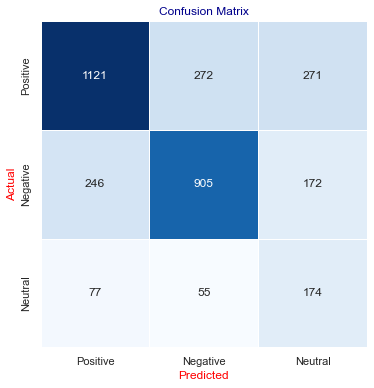

In [11]:
conf = confusion_matrix(pred,test_data['Sentiment'],labels=["Positive","Negative","Neutral"])
draw_matrix(conf)

In [ ]:
import random
cls = ['Positive','Negative','Neutral']
def random_assign(tweets,labels):
    pred = [random.choice(cls) for tweet in tweets]
    return [confusion_matrix(labels,pred,labels=cls),np.mean(pred==labels)]

conf,acc = random_assign(test_data['CoronaTweet'],test_data['Sentiment'])
print(acc)
draw_matrix(conf)

In [ ]:
def pred_pos(tweets,labels):
    pred = ['Positive']*len(tweets)
    return [confusion_matrix(labels,pred,labels=cls),np.mean(pred==labels)]

conf,acc=pred_pos(test_data['CoronaTweet'],test_data['Sentiment'])
print(acc)
draw_matrix(conf)

In [ ]:
path = 'Domain_Adaptation/Twitter_train_{}.csv'
destin = 'domain/Twitter_train_{}.csv'
def stem(data,dest):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    X = [word_tokenize(re.sub('[{}]'.format(string.punctuation), ' ', tweet)) for tweet in data['Tweet']]
    with open(dest,"w", encoding='utf-8') as f:
        f.write("ID,Sentiment,Tweet\n")
    for i in range(len(X)):
        X[i] = " ".join([stemmer.stem(word) for word in X[i] if word.lower() not in stop_words])
        with open(dest,"a", encoding='utf-8') as f:
            f.write(str(data['ID'][i])+","+data['Sentiment'][i]+',"'+X[i]+'"\n')
    return X
# for x in [1,2,5,10,25,50,100]:
#     data = pd.read_csv(path.format(x))

#     dest = destin.format(x)

    
#     stem(data)
data = pd.read_csv('Domain_Adaptation/Twitter_validation.csv')
dest = 'domain/Twitter_validation.csv'
stem(data,dest)

In [ ]:
data = pd.read_csv('train_stem.csv')
data

In [ ]:
def unigram(text:str):
    text = text.split()
    return text
def bigram(text:str):
    text = text.split()
    # bigrams = []
    n=len(text)
    for i in range(n-1):
        text.append((text[i]+" "+text[i+1]))
    return text
def trigram(text:str):
    text = text.split()
    # trigrams = []
    n=len(text)
    for i in range(n-1):
        text.append((text[i]+" "+text[i+1]))
    for i in range(n-2):
        text.append((text[i]+" "+text[i+1]+" "+text[i+2]))
    return text

In [ ]:
data = pd.read_csv('train_stem.csv')

data

In [ ]:
split_fn = bigram
probability = {'Positive':0,'Negative':0,'Neutral':0}
classes = {'Positive':0,'Negative':1,'Neutral':2}
d = defaultdict(lambda:np.ones(3))

for tweet in data.values:
    tweet[2] = split_fn(tweet[2])
    for word in tweet[2]:
        word = word.lower()
        d[word][classes[tweet[1]]]+=1
    probability[tweet[1]]+=1

print(probability)
total = sum(probability.values())

for i in probability:
    probability[i]/=total


In [ ]:
len(d)
ans = [0,0,0]
for i in d:
    ans[0]+=1 if d[i][0]!=0 else 0
    ans[1]+=1 if d[i][1]!=0 else 0
    ans[2]+=1 if d[i][2]!=0 else 0
ans

In [ ]:
den = sum(d.values())
def theta(l):
    num = d[l]
    return num/den
def predict(tweet,probability,split_fn):
    prob = np.log([probability['Positive'],probability['Negative'],probability['Neutral']])
    for word in split_fn(tweet):
        # word = word.lower()
        prob += np.log(theta(word))

    if np.max(prob)==prob[0]:
        return "Positive"
    elif np.max(prob)==prob[1]:
        return "Negative"
    else:
        return "Neutral"

def accuracy(tweets,labels):
    pred = [];ans=0
    for i in range(len(tweets)):
        x  = predict(tweets[i],probability,split_fn=split_fn)
        pred.append(x)
        ans+=(x==labels[i])
    return pred,ans/len(labels)

In [ ]:
test_data = pd.read_csv('valid_stem.csv')

In [ ]:
pred,acc = accuracy(data['CoronaTweet'],data['Sentiment'])
acc

In [ ]:
confusion_matrix(pred,data['Sentiment'],labels=["Positive","Negative","Neutral"])

In [ ]:
path = 'domain/Twitter_train_{}.csv'

In [ ]:
domain_test = pd.read_csv('domain/Twitter_validation.csv')

In [ ]:
for x in [1,2,5,10,25,50,100]:
    print(x)
    domain_data = pd.read_csv(path.format(x))
    split_fn = bigram
    probability = {'Positive':0,'Negative':0,'Neutral':0}
    classes = {'Positive':0,'Negative':1,'Neutral':2}
    d = defaultdict(lambda:np.ones(3))

    for tweet in data.values:
        tweet[2] = split_fn(tweet[2])
        for word in tweet[2]:
            word = word.lower()
            d[word][classes[tweet[1]]]+=1
        probability[tweet[1]]+=1
    for tweet in domain_data.values:
        tweet[2] = split_fn(str(tweet[2]))
        for word in tweet[2]:
            word = word.lower()
            d[word][classes[tweet[1]]]+=1
        probability[tweet[1]]+=1
    print(probability)
    total = sum(probability.values())

    for i in probability:
        probability[i]/=total
    den = sum(d.values())
    def theta(l):
        num = d[l]
        return num/den
    def predict(tweet,probability,split_fn):
        prob = np.log([probability['Positive'],probability['Negative'],probability['Neutral']])
        for word in split_fn(tweet):
            # word = word.lower()
            prob += np.log(theta(word))

        if np.max(prob)==prob[0]:
            return "Positive"
        elif np.max(prob)==prob[1]:
            return "Negative"
        else:
            return "Neutral"

    def accuracy(tweets,labels):
        pred = [];ans=0
        for i in range(len(tweets)):
            x  = predict(str(tweets[i]),probability,split_fn=split_fn)
            pred.append(x)
            ans+=(x==labels[i])
        return pred,ans/len(labels)
    pred,acc = accuracy(domain_test['Tweet'],domain_test['Sentiment'])
    print(acc)
    # print(confusion_matrix(pred,domain_test['Sentiment'],labels=["Positive","Negative","Neutral"]))
    print('\n')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

C_values = [1e-5, 1e-3, 1, 5, 10]
validation_accuracy = [40.166666666666664, 40.166666666666664, 55.91666666666667, 59.25, 60.83333333333333]
k_fold_accuracy = [15.644257703081232, 16.64565826330532, 49.71, 58.58, 63.87]

fig, ax = plt.subplots()

ax.set_xscale('log')
plt.plot(C_values, validation_accuracy, marker='o', label='Validation Accuracy')
plt.plot(C_values, k_fold_accuracy, marker='s', label='5-fold Cross-Validation Accuracy')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. C Value (log scale)')
plt.grid()
plt.tight_layout()
plt.show()
